In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
def savefig(base):
    import matplotlib.pyplot as plt
    for fname in [f'Manuscript/resources/{base}.png',f'Manuscript/resources/{base}.svg']:
        print(fname)
        plt.savefig(fname, bbox_inches='tight')

In [4]:
base='sims/2023-04-06'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

In [5]:
rf_size=19
eta=1e-6
number_of_neurons=5
number_of_processes=4
mu_c_mat=[0,7.5]
sigma_c_mat=[0,2]
blur_mat=[0,2,4,6,8,10,12]

In [6]:
from collections import namedtuple
params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0
eta_count=0
noise_count=0
open_eye_noise=0.1

for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        for blur_count,blur in enumerate(blur_mat):
        
            all_params.append(params(count=count,
                         eta=eta,
                         noise=open_eye_noise,
                         blur=blur,
                         number_of_neurons=number_of_neurons,
         sfname=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf',
                                mu_c=mu_c,sigma_c=sigma_c))

        count+=1
for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.1, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 0 blur.asdf', mu_c=0, sigma_c=0)
params(count=0, eta=1e-06, noise=0.1, blur=2, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 2 blur.asdf', mu_c=0, sigma_c=0)
params(count=0, eta=1e-06, noise=0.1, blur=4, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 4 blur.asdf', mu_c=0, sigma_c=0)
params(count=0, eta=1e-06, noise=0.1, blur=6, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 6 blur.asdf', mu_c=0, sigma_c=0)
params(count=0, eta=1e-06, noise=0.1, blur=8, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 8 blur.asdf', mu_c=0, sigma_c=0)
[....]
params(count=3, eta=1e-06, noise=0.1, blur=4, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 7.5 mu_c 2 sigma_c 4 blur.asdf', mu_c=7.5, sigma_c=2)
params(count=3, eta=1e-06, noise=0.

In [7]:
do_params=make_do_params(all_params)
print(len(do_params))

28


In [8]:
def run_one_deficit_jitter(params,overwrite=False,run=True):
    import plasticnet as pn
    
    count,eta,noise,blur,number_of_neurons,sfname,mu_c,sigma_c=(params.count,params.eta,params.noise,params.blur,
                                        params.number_of_neurons,params.sfname,params.mu_c,params.sigma_c)
    
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    seq=pn.Sequence()

    t=16*day
    ts=1*hour

    seq+=blur_jitter_deficit(blur=[blur,-1],
                                total_time=t,
                                noise=noise,eta=eta,number_of_neurons=number_of_neurons,
                                mu_c=mu_c,sigma_c=sigma_c,
                                save_interval=ts)

    if run:
        seq.run(display_hash=False)
        pn.save(sfname,seq) 
    
    return sfname
    
    


In [9]:
func=run_one_deficit_jitter

In [10]:
#premake the images
for p in tqdm(all_params):
    run_one_deficit_jitter(p,overwrite=True,run=False)

 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_209039059337ac29bd5297b6858c67ce.asdf...Resolution float64 -> uint16
done.
Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_6c7e49068befad3a3c4bcc33931dd144.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_a4d161717c46c5d4d9577371a4a495da.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_33487c39ae14fd4b2e1147c1b93a3055.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_4ec4480212d62dc13136d68c2eb9a8f3.asdf from cache.Usi

In [11]:
# %%time
print(func.__name__)
func(do_params[0],overwrite=True)

run_one_deficit_jitter
Using cache_images/cache_images_33487c39ae14fd4b2e1147c1b93a3055.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.[.] Sequence Time Elapsed...3 m, 26.95 s


'sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c.asdf'

In [11]:
real_time=1*60+ 52

In [12]:
print(time2str(real_time*len(do_params)/number_of_processes))

13 m, 4.00 s


In [13]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(run_one_deficit_jitter, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_6c7e49068befad3a3c4bcc33931dd144.asdf from cache.Using cache_images/cache_images_a4d161717c46c5d4d9577371a4a495da.asdf from cache.Using cache_images/cache_images_33487c39ae14fd4b2e1147c1b93a3055.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.[[[[.] Sequence Time Elapsed...3 m, 46.58 s
.] Sequence Time Elapsed...3 m, 46.59 s..
] ] Sequence Time Elapsed...3 m, 46.60 sSequence Time Elapsed...3 m, 46.60 s

Using cache_images/cache_images_4ec4480212d62dc13136d68c2eb9a8f3.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.[Using cache_images/cache_

['sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 0 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 2 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 4 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 6 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 8 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 10 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 12 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 2 sigma_c 0 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 2 sigma_c 2 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 2 sigma_c 4 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 2 sigma_c 6 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 2 sigma_c 8 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 2 sigma_c 10 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 0 mu_c 2 sigma_c 12 blur.asdf',
 'sims/2023-04-06/deficit 5 neurons 7.5 mu_c 0 sigma_c 0 b

/Users/bblais/tmp/ipykernel_39643/2273577042.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()


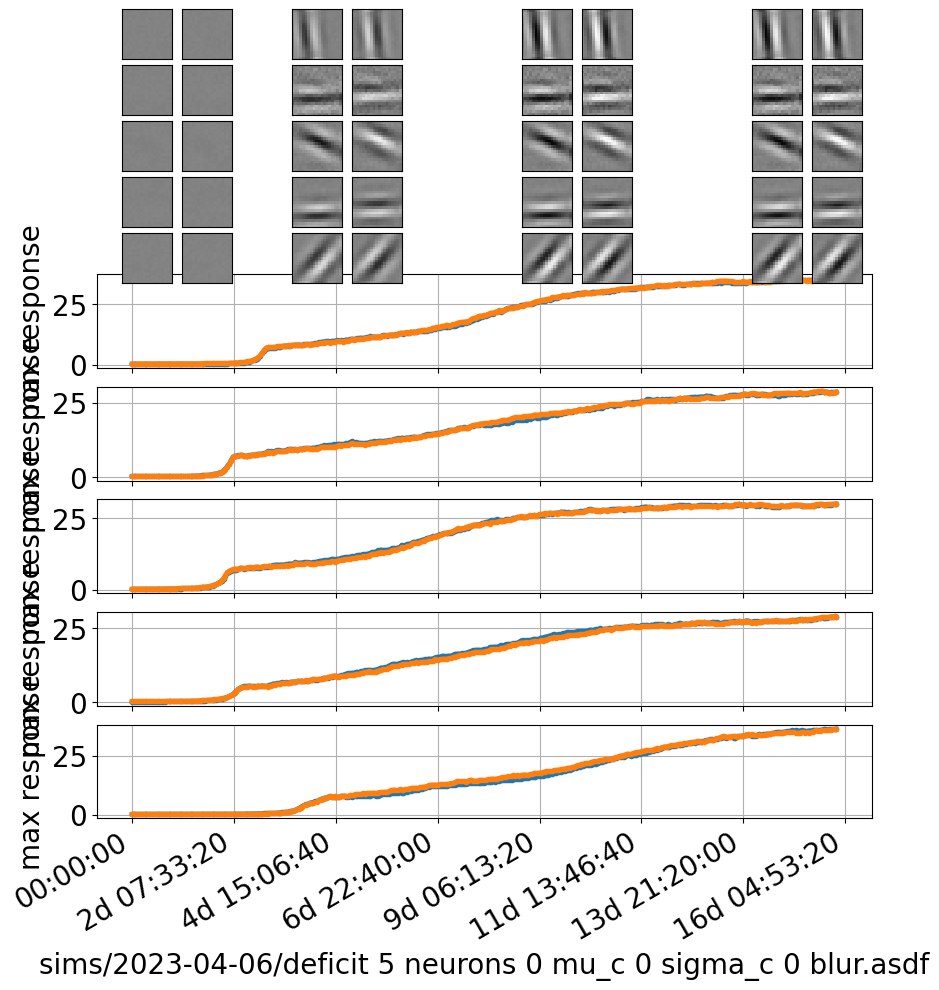

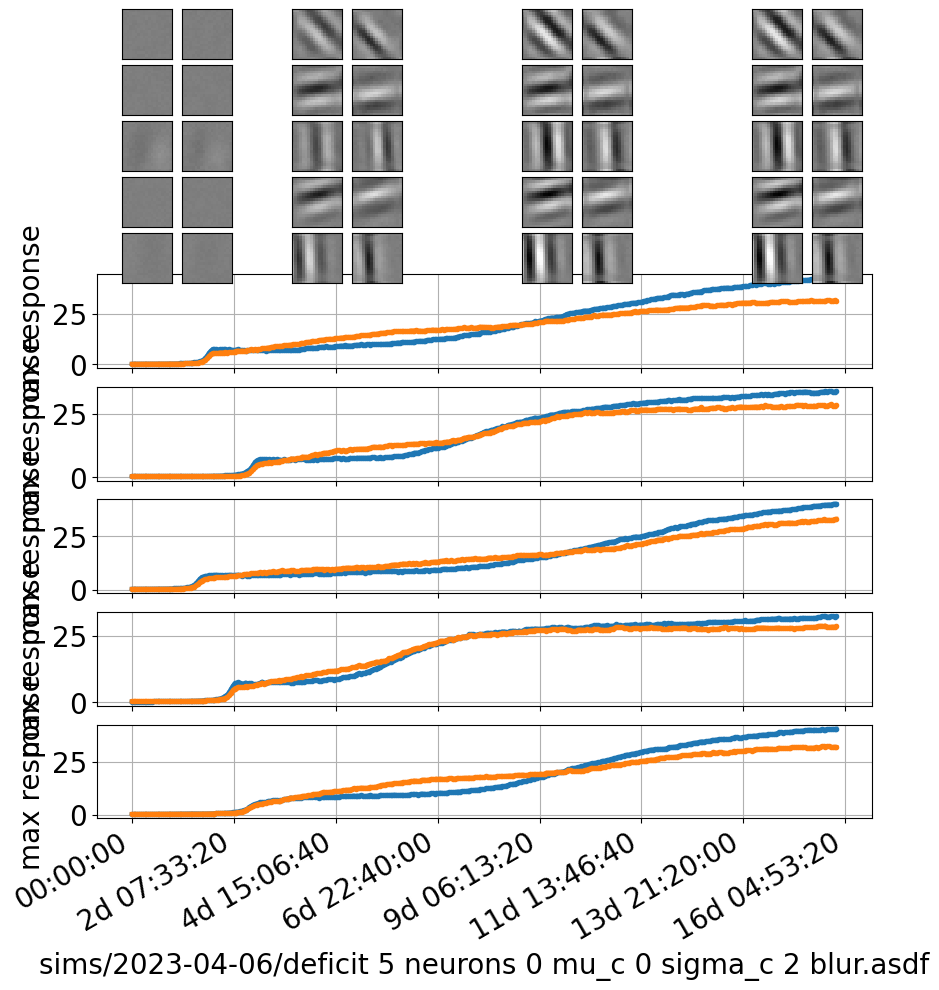

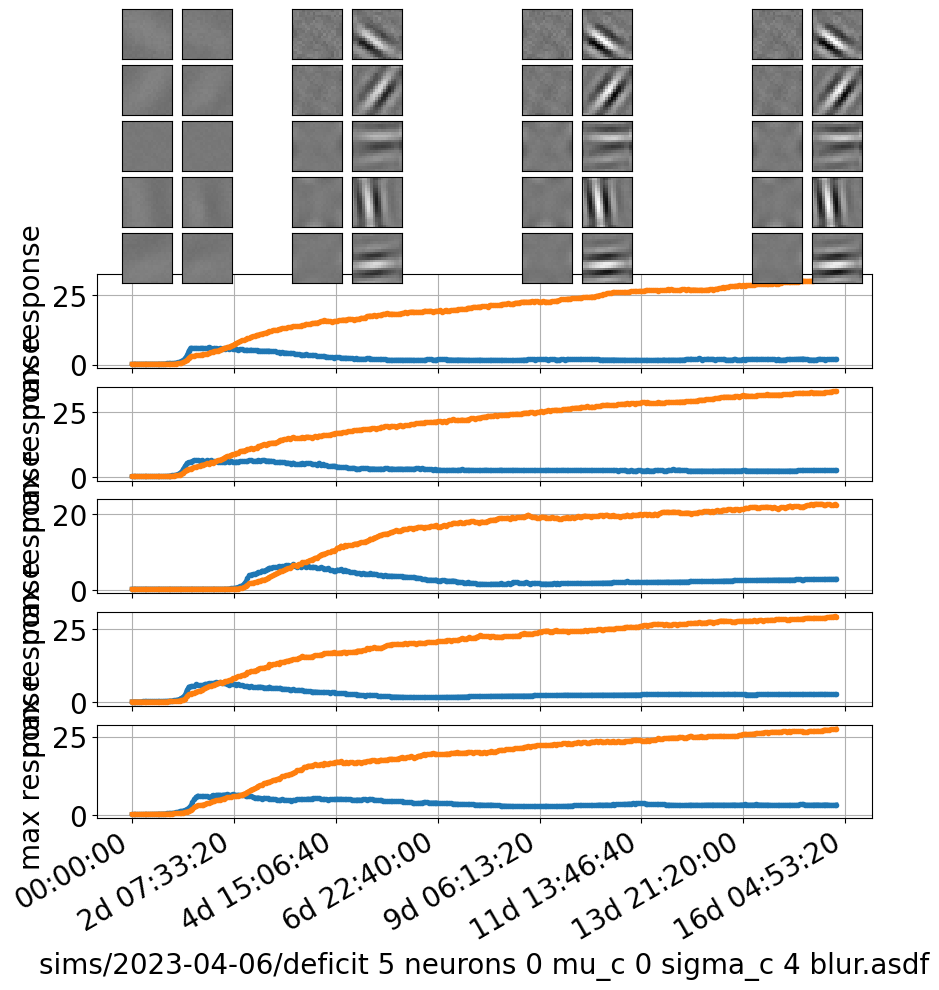

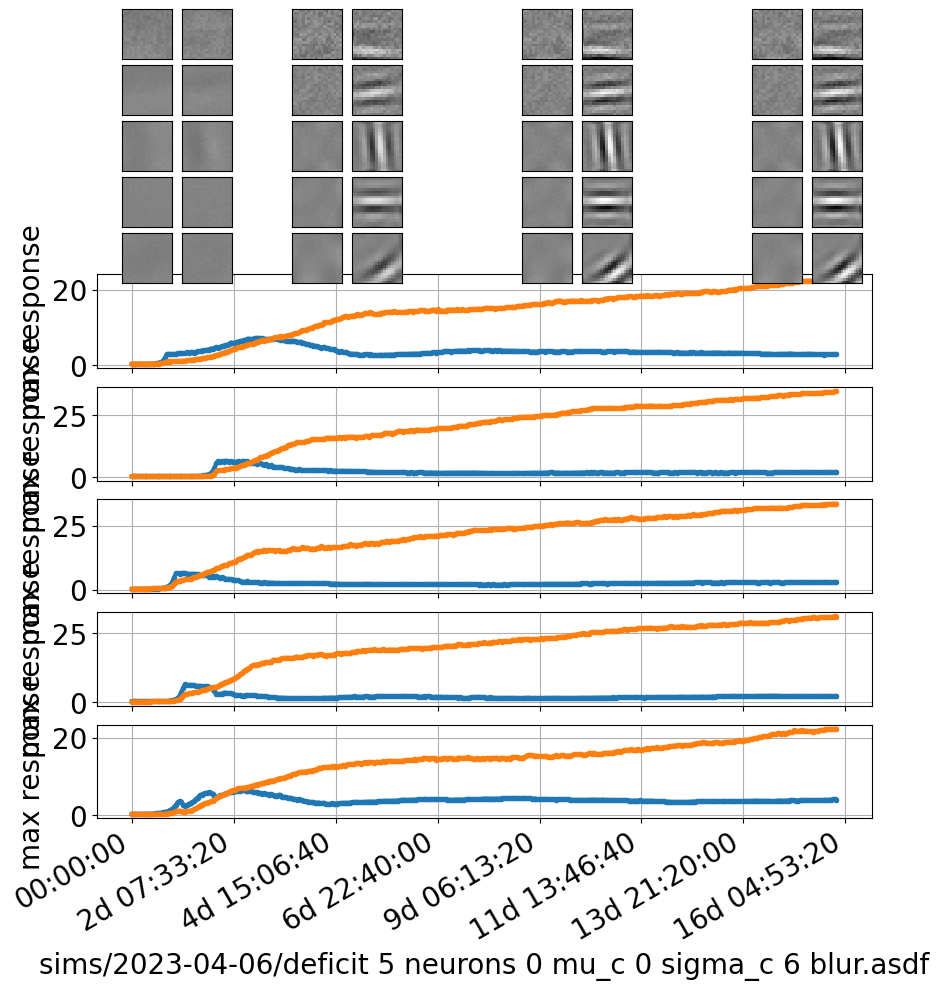

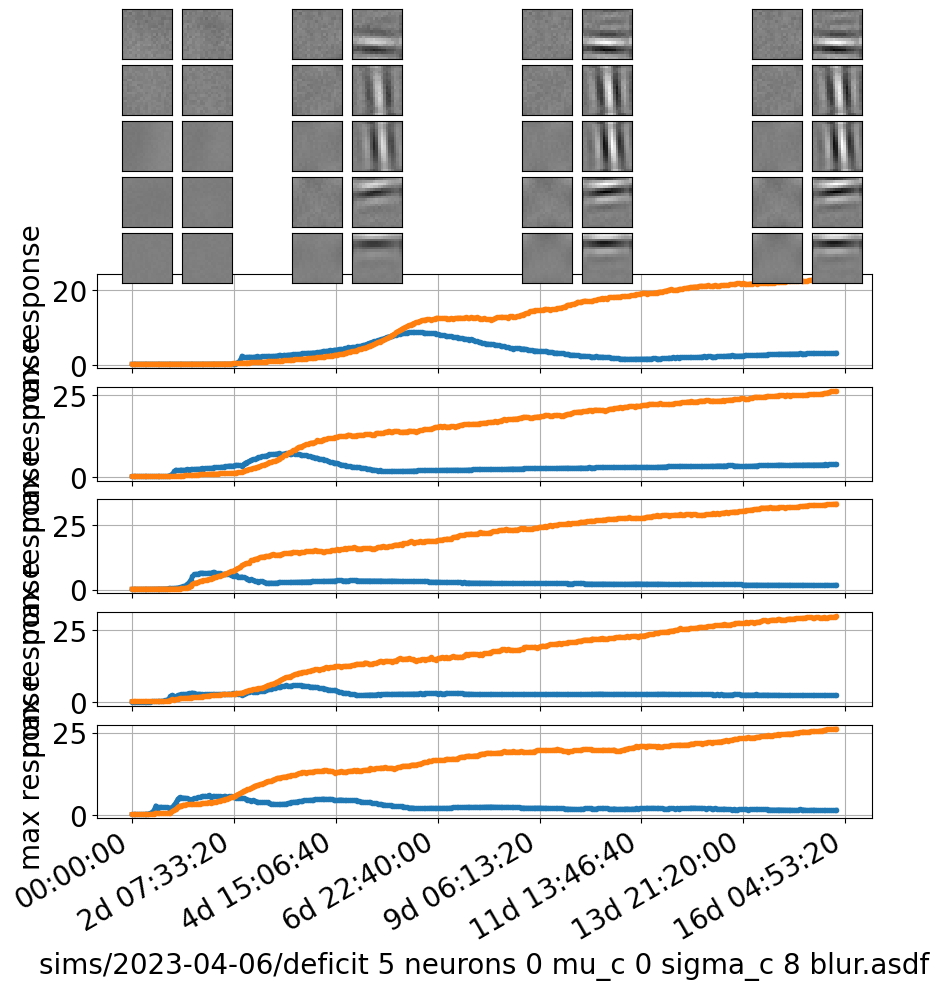

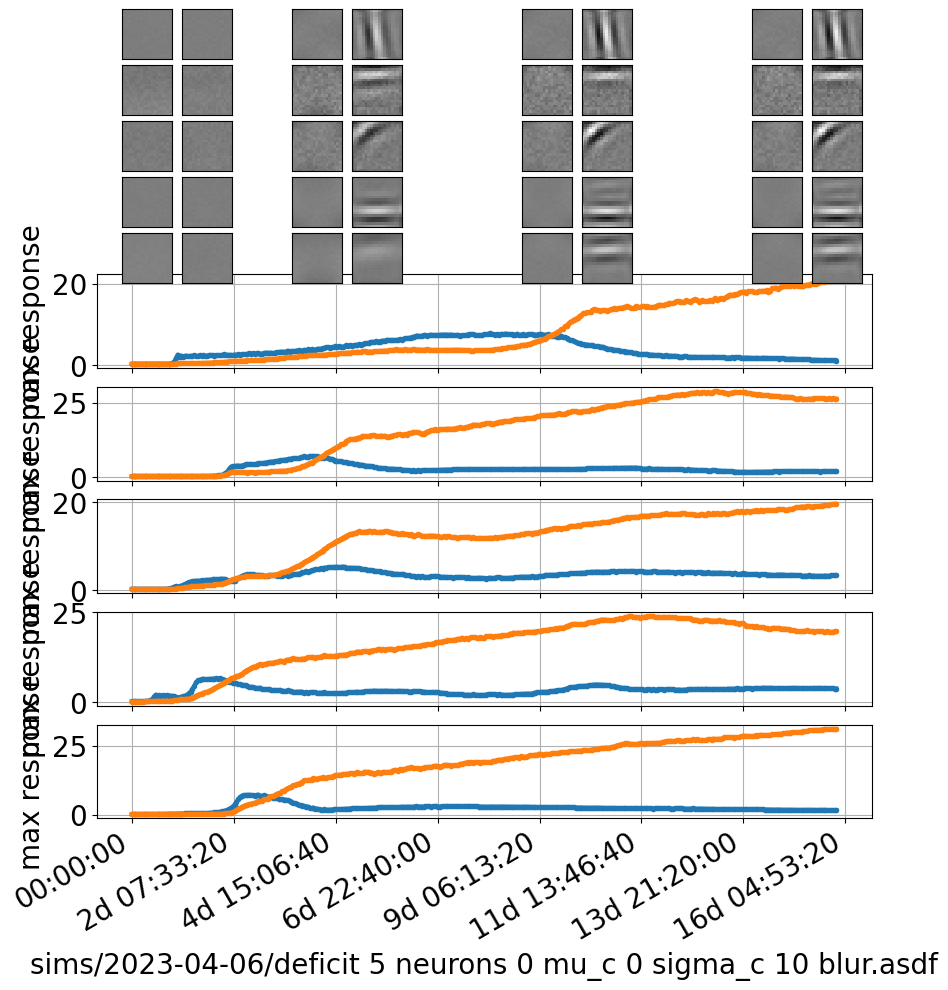

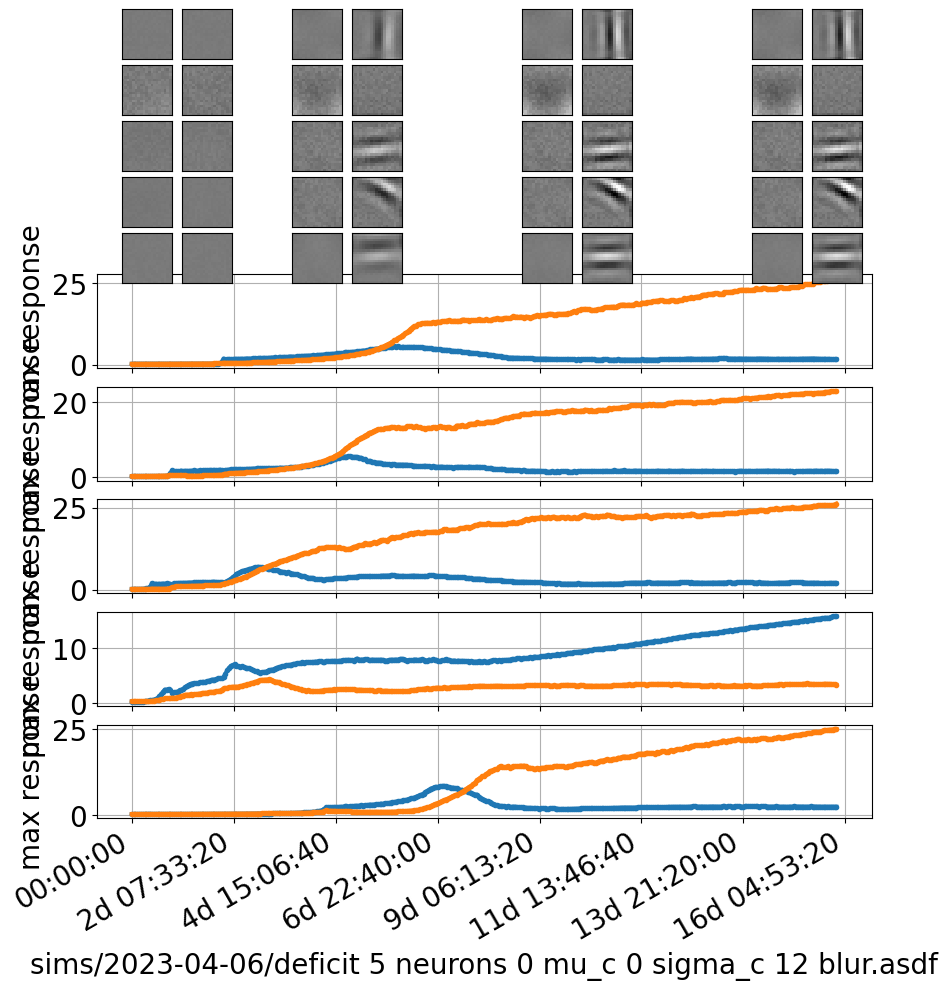

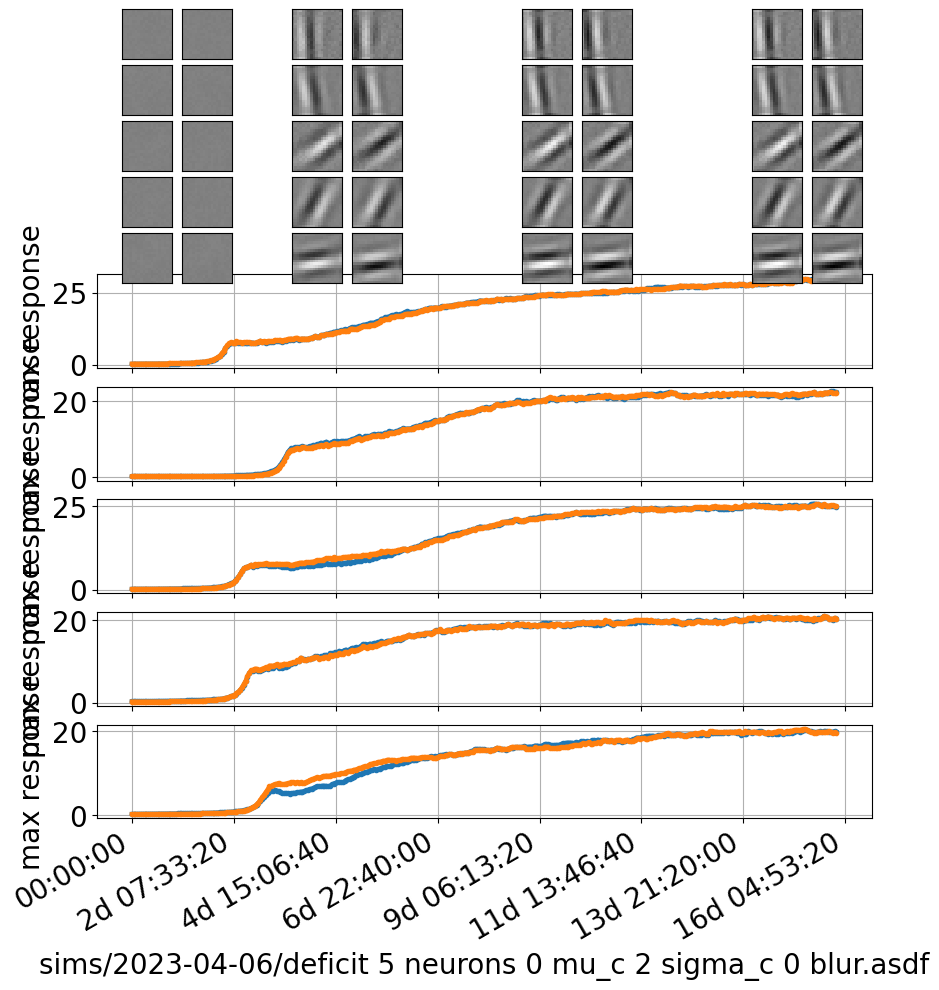

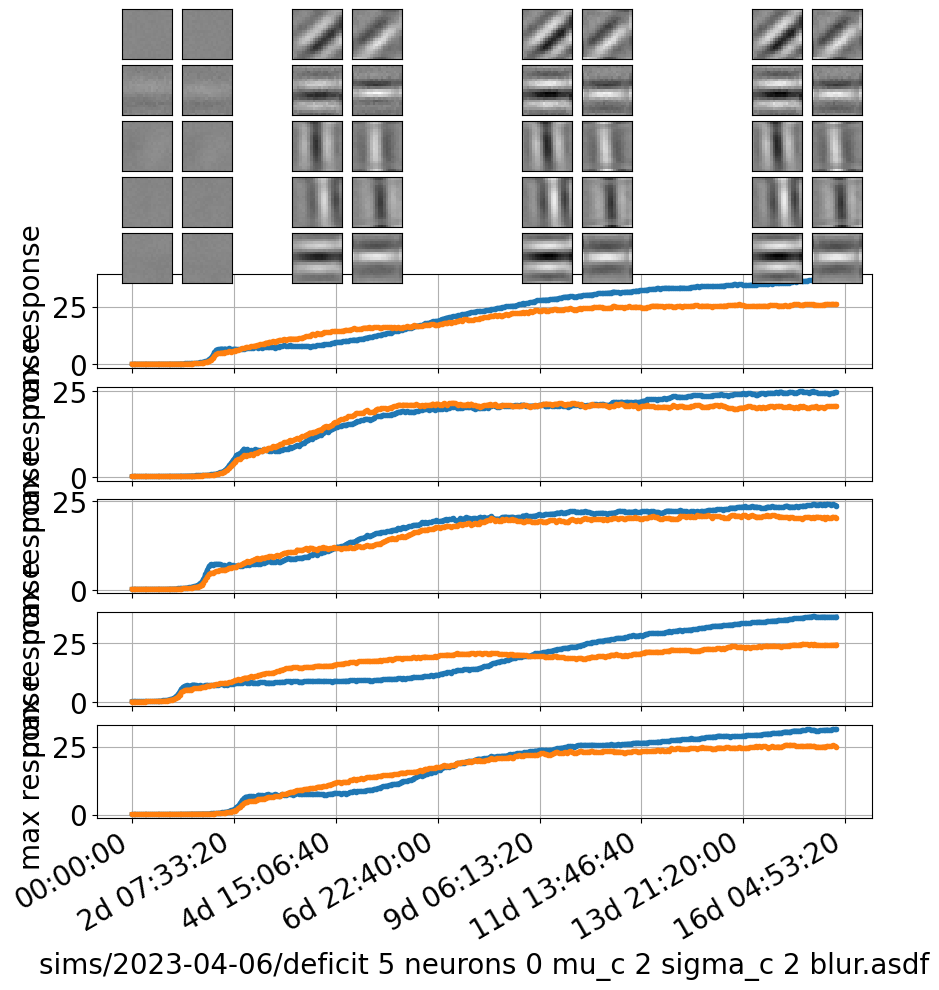

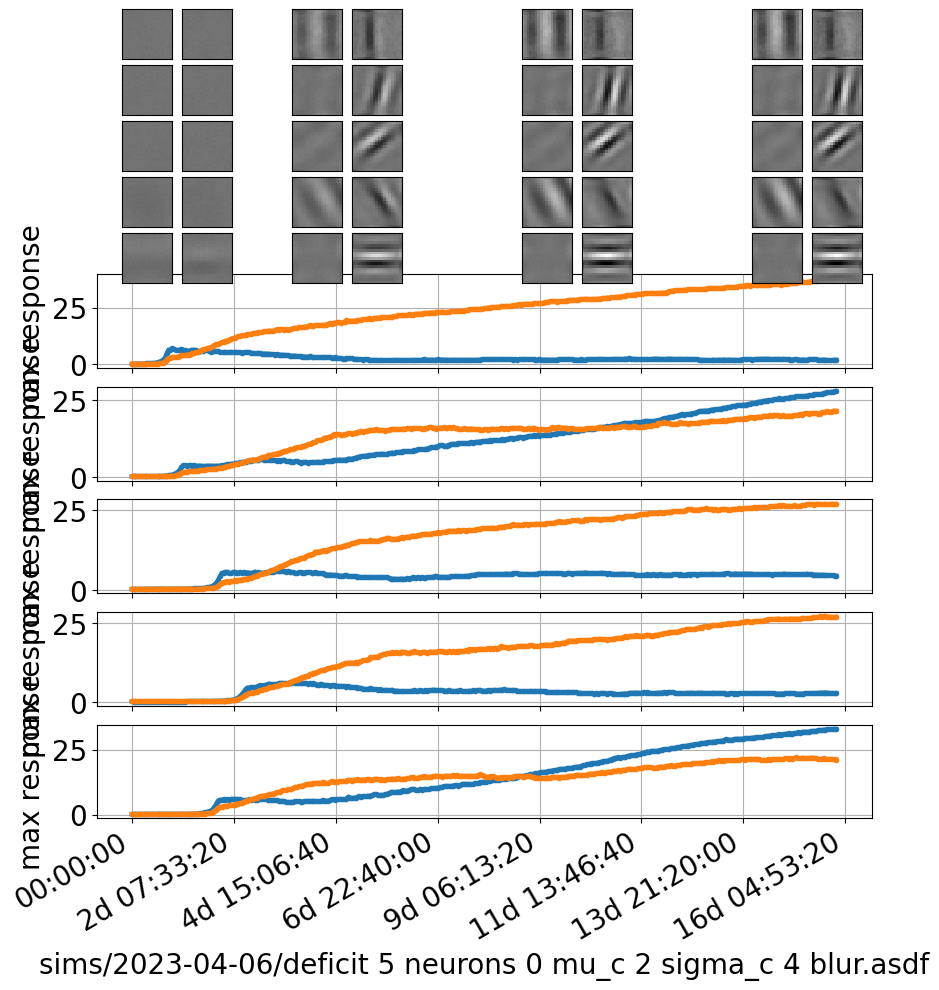

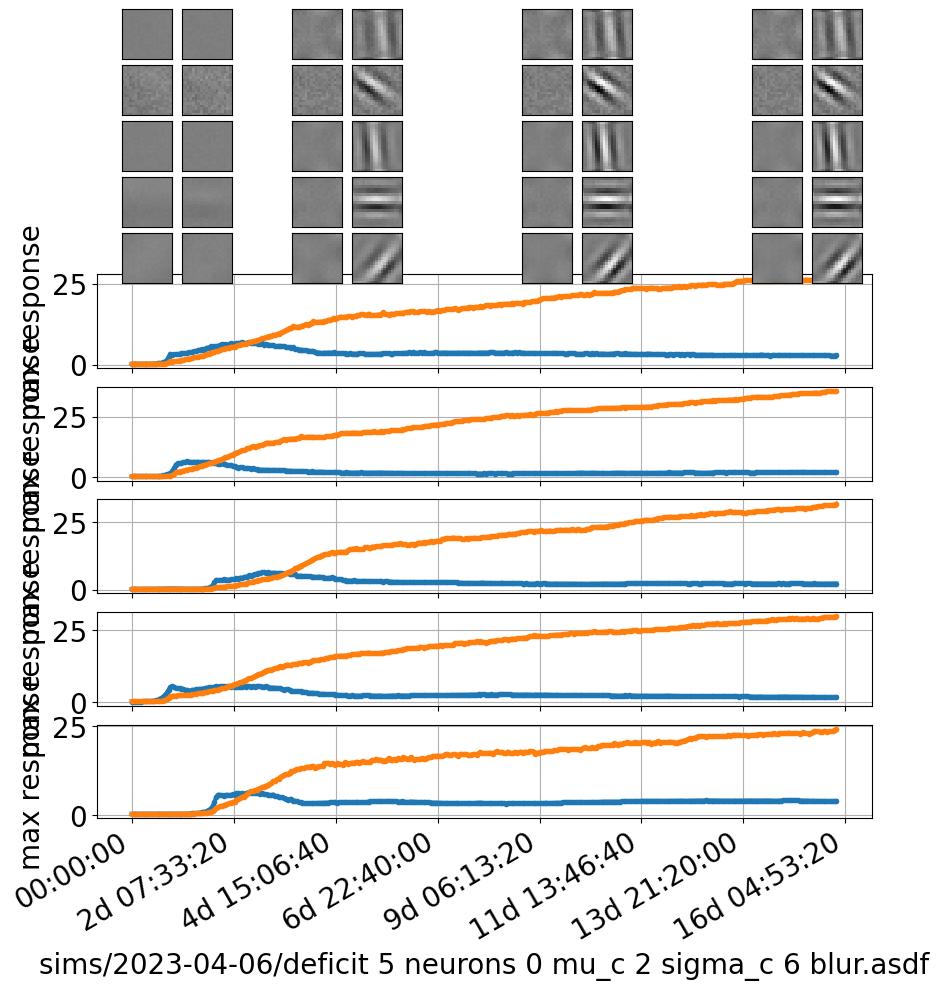

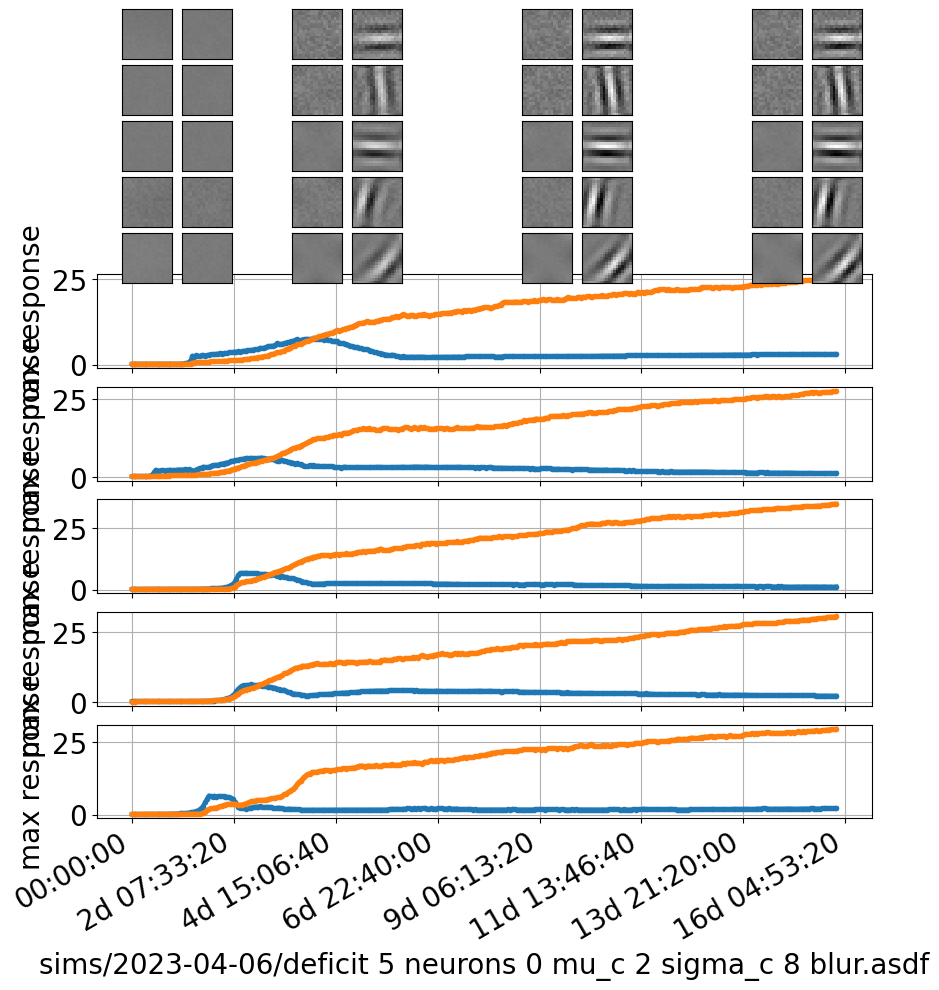

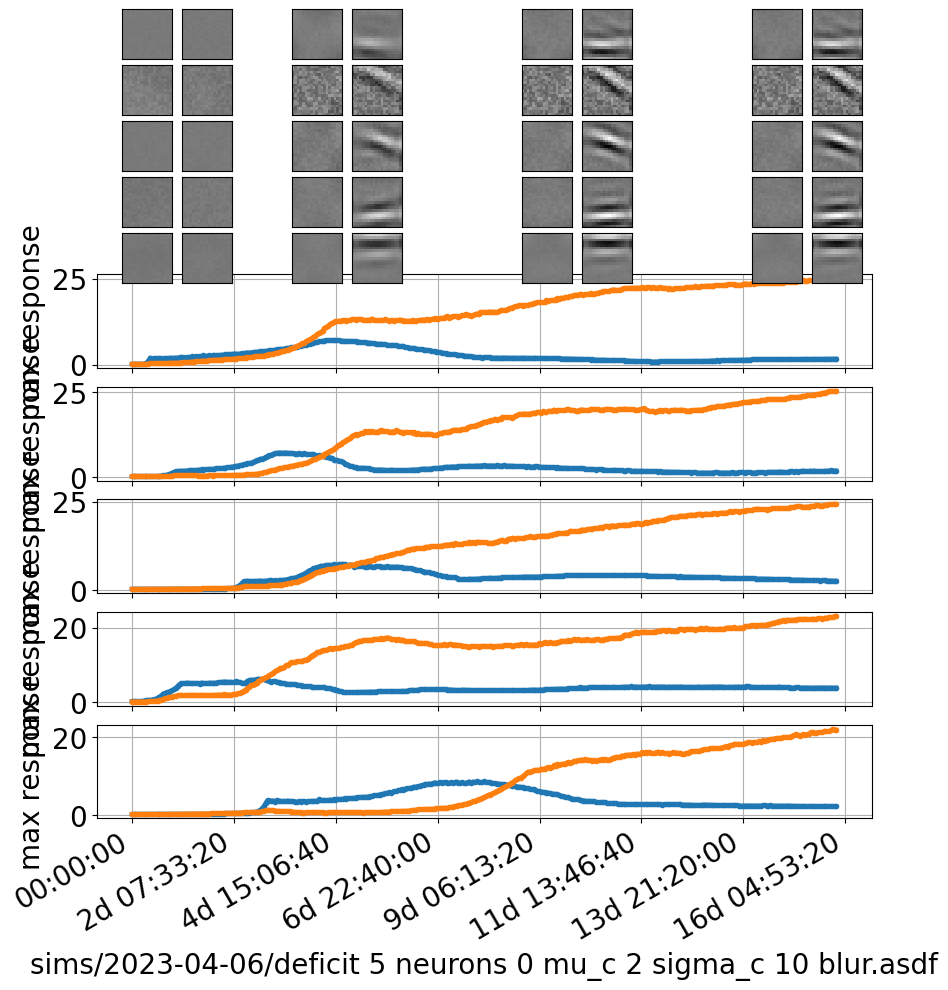

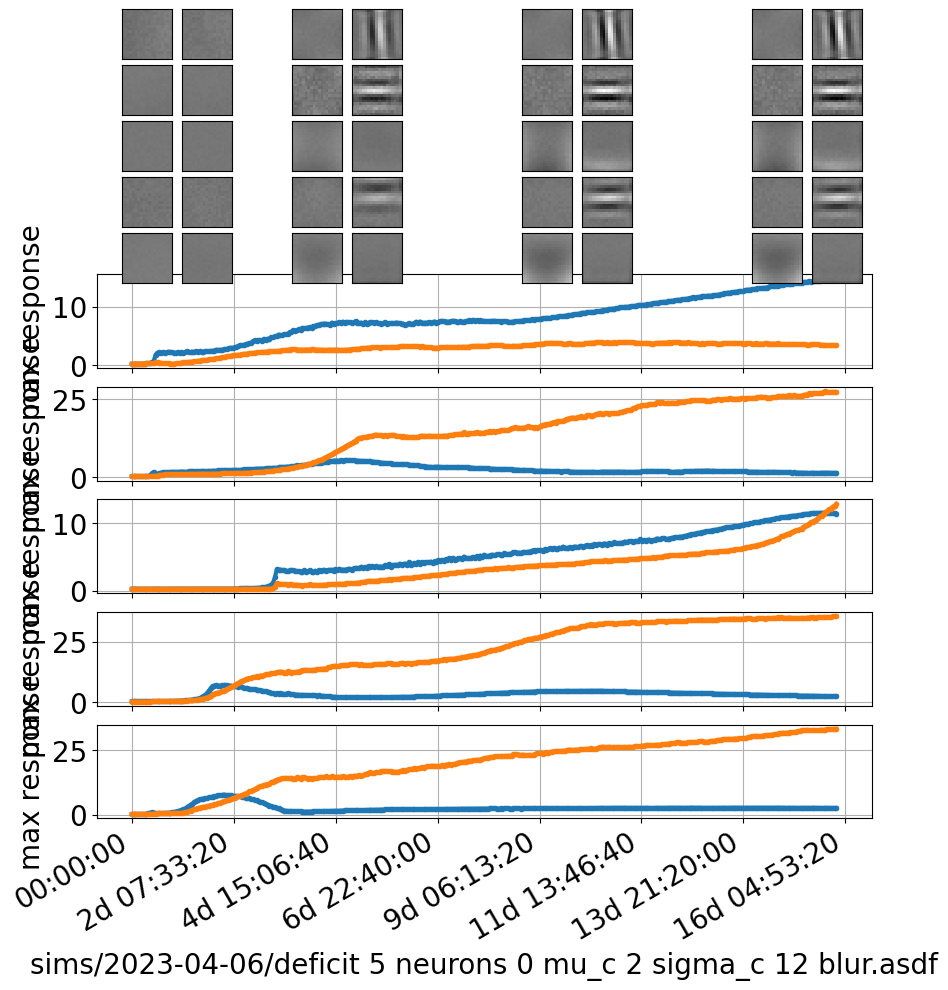

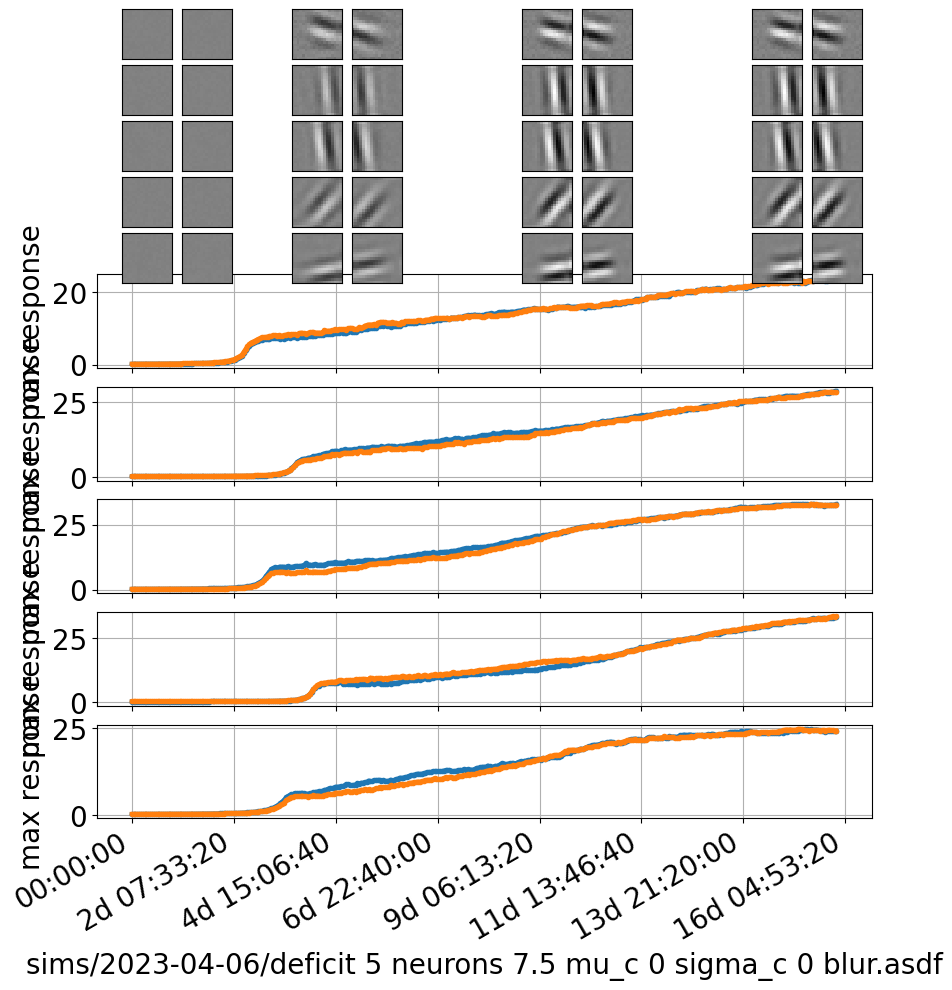

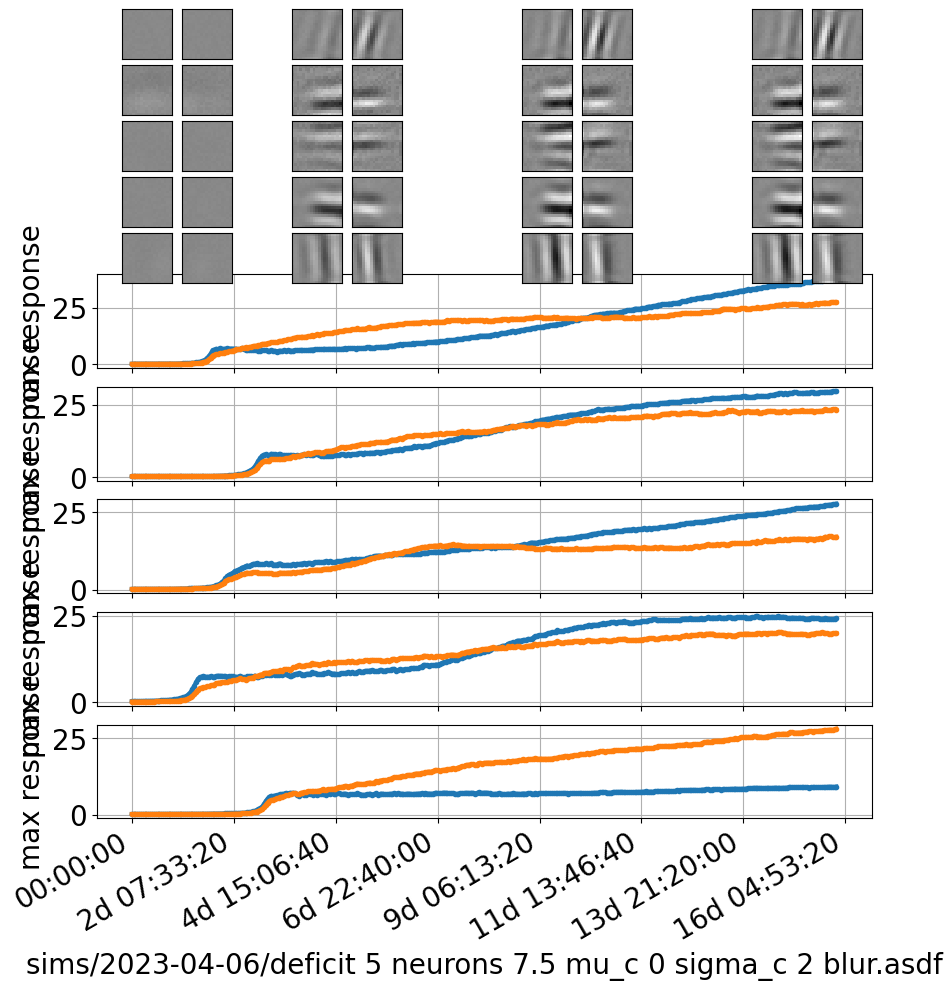

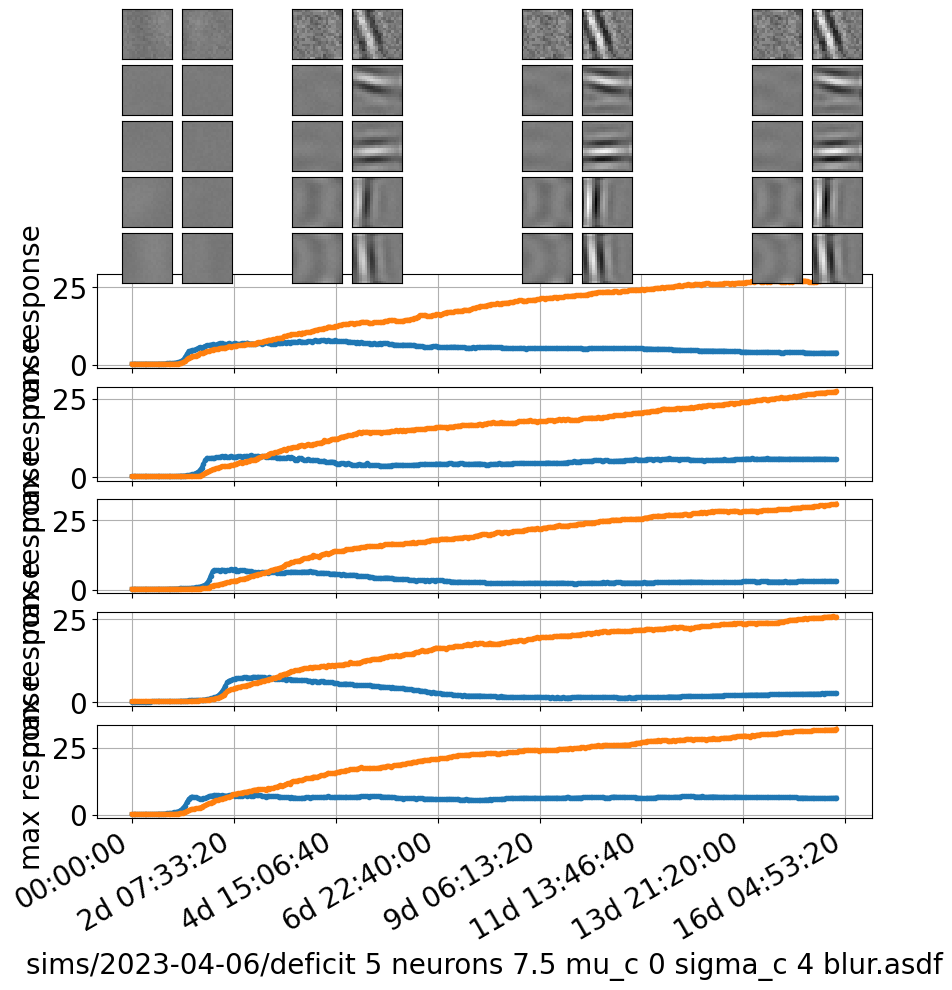

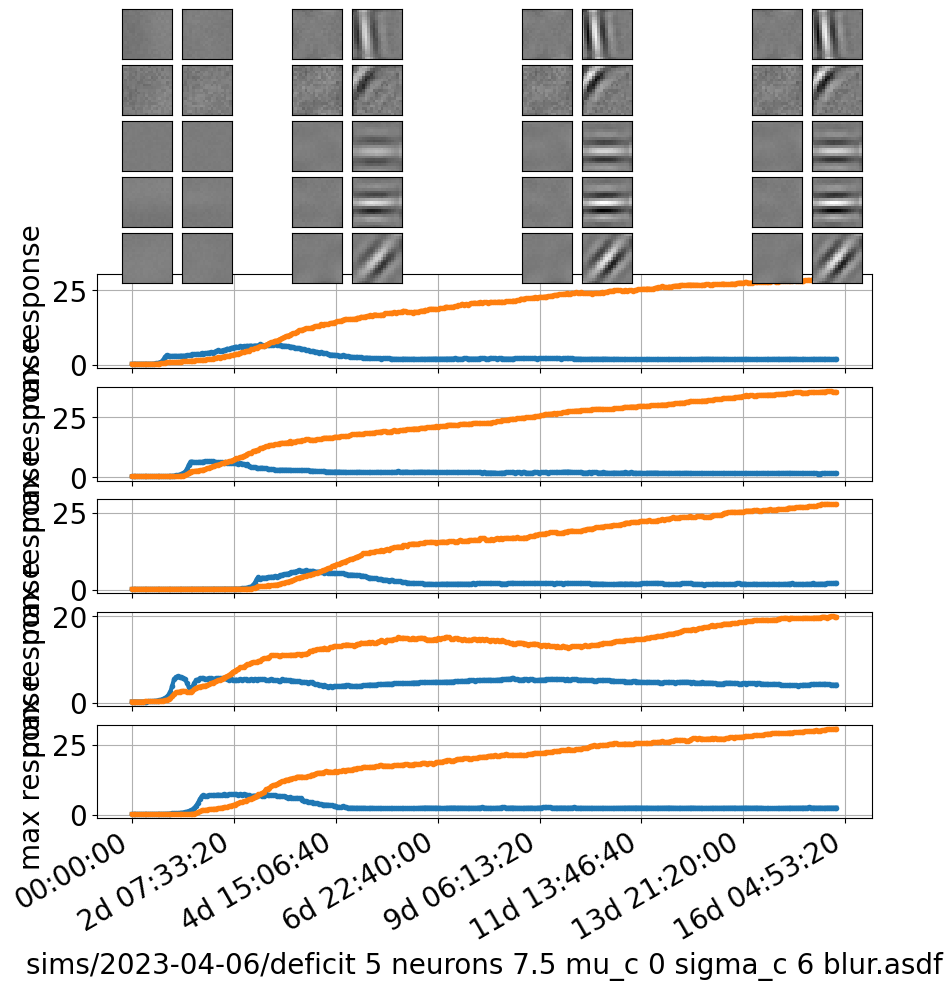

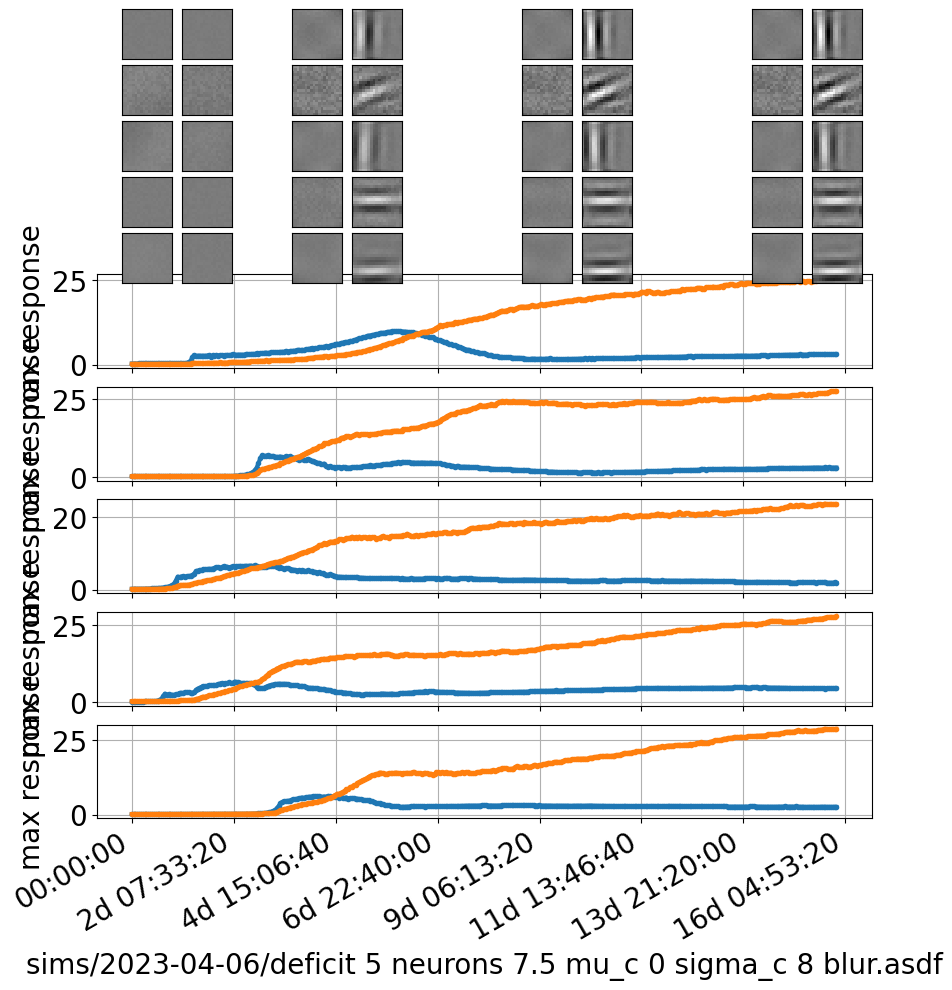

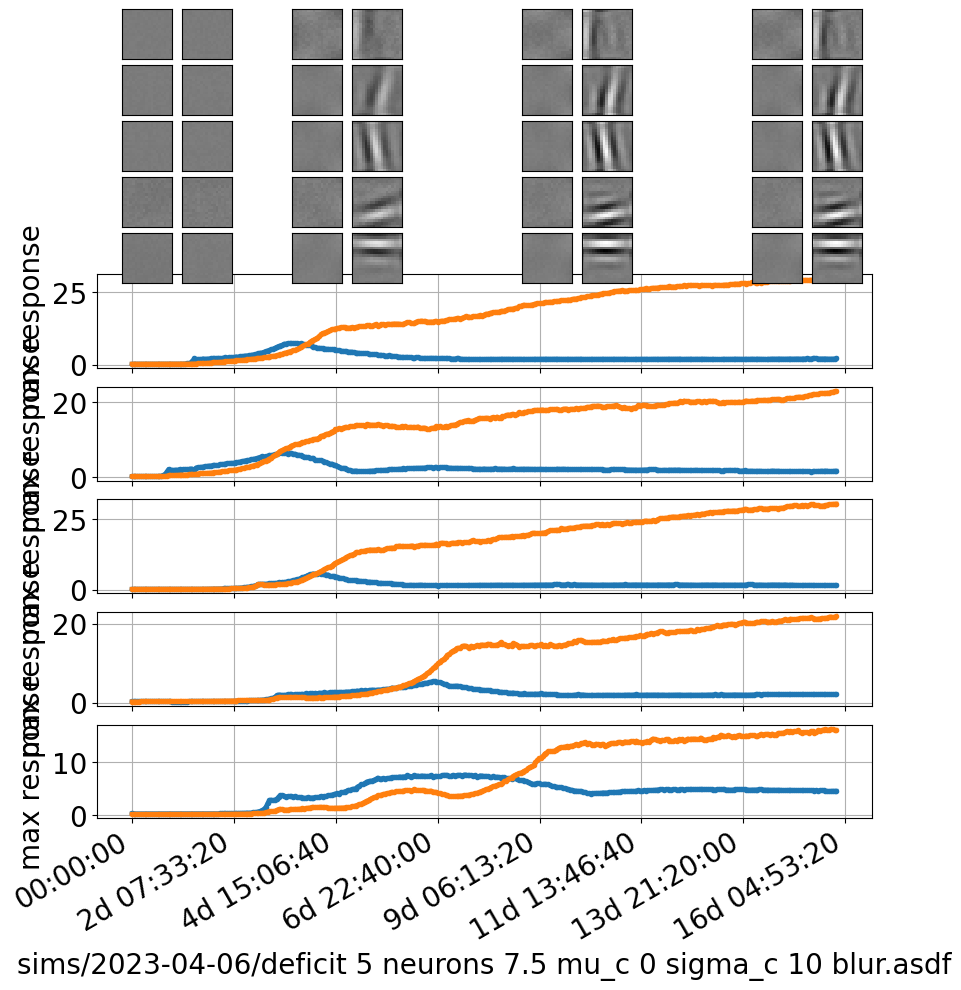

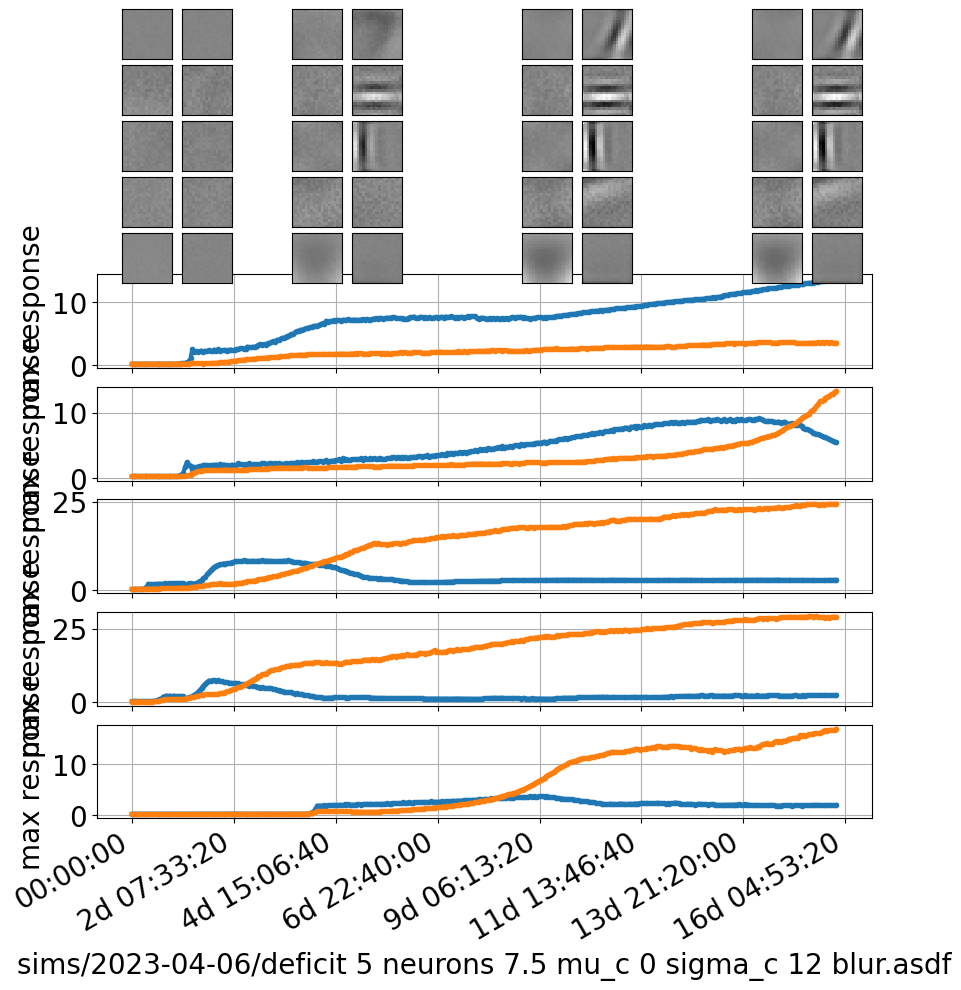

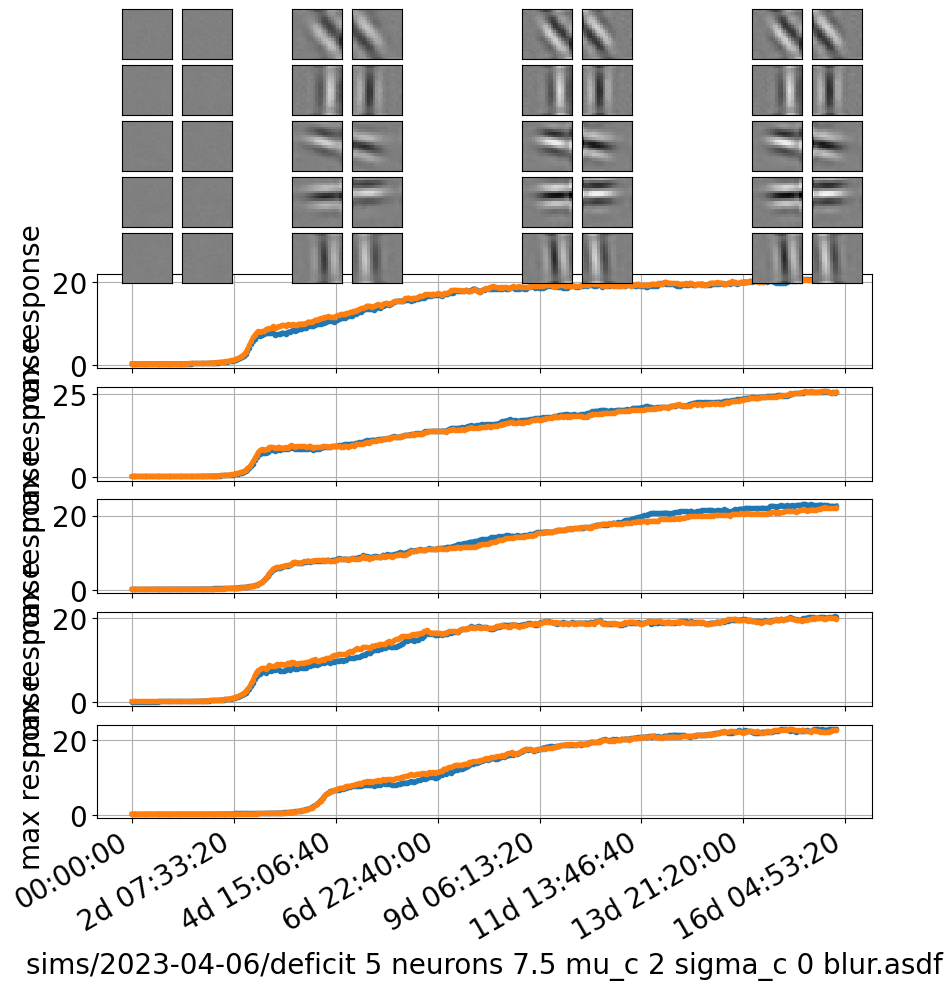

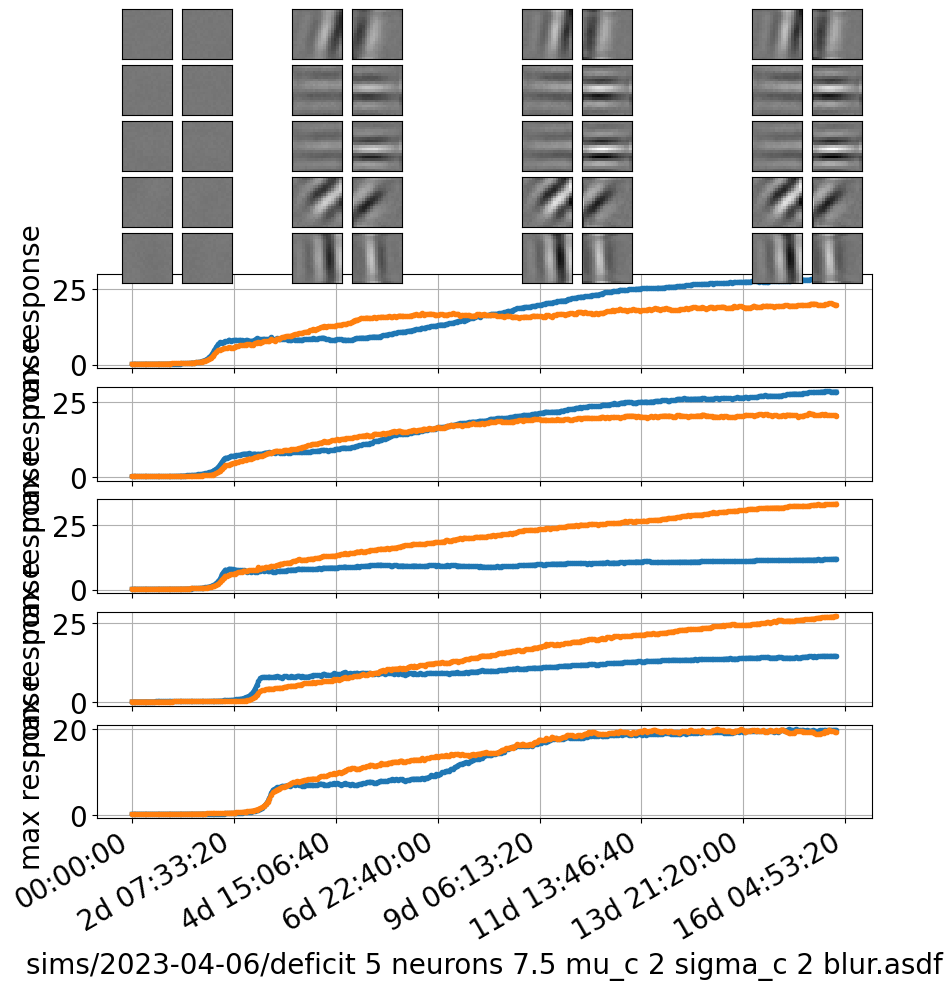

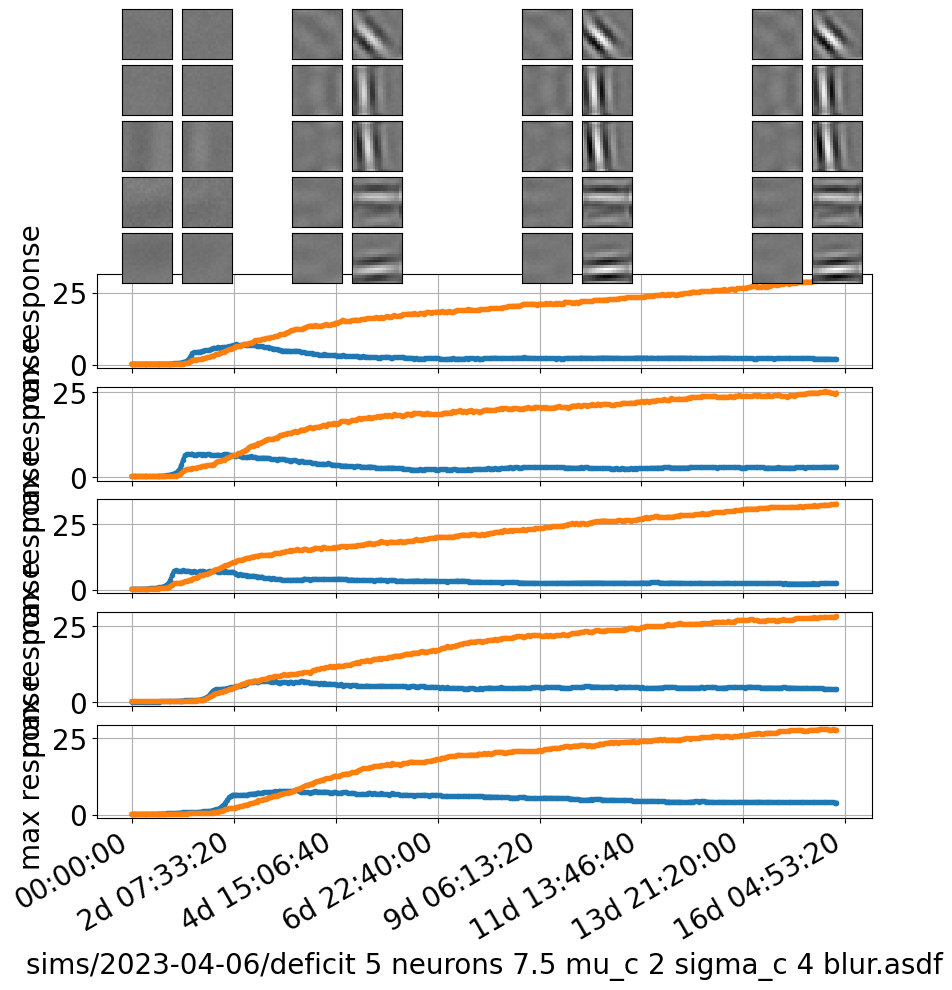

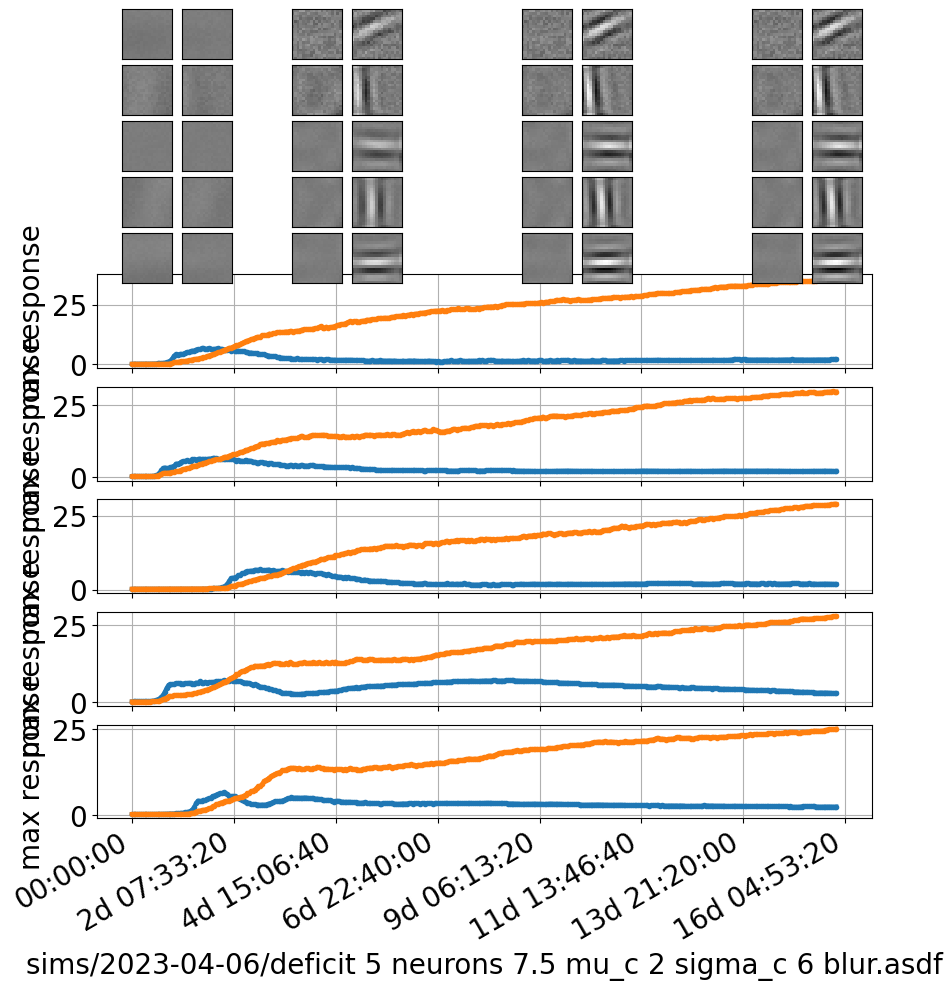

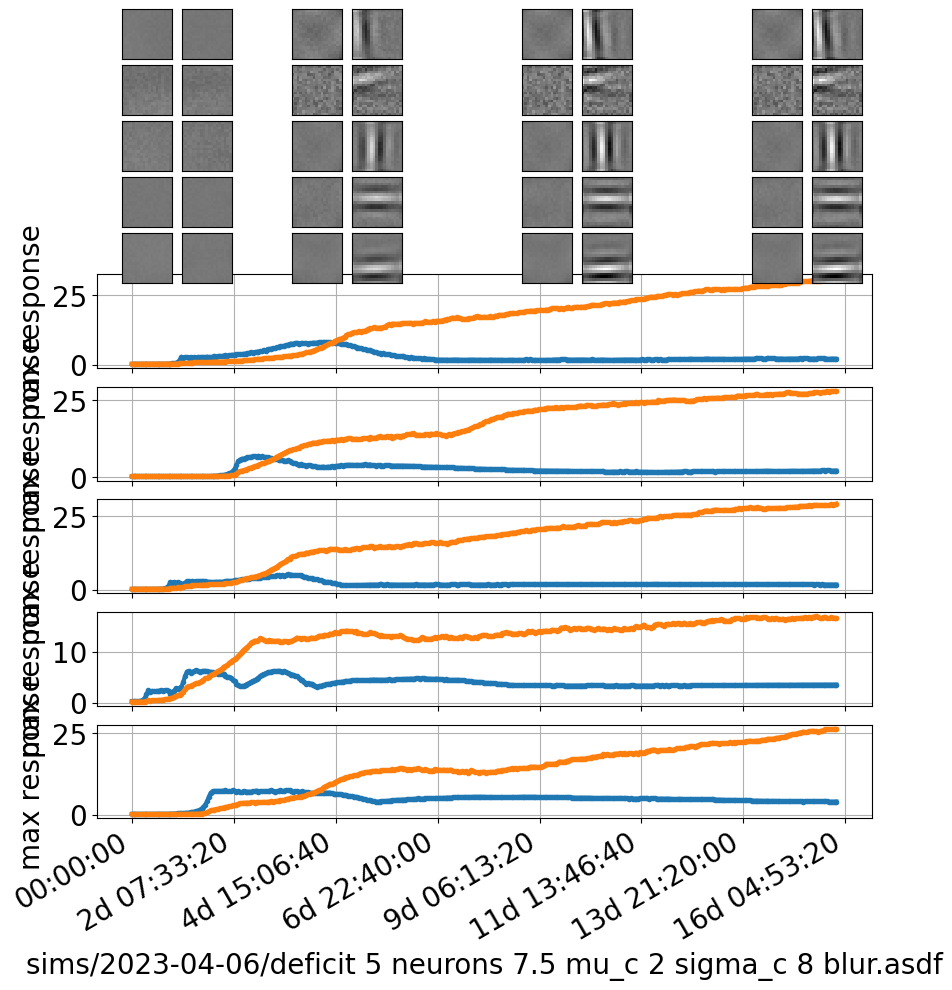

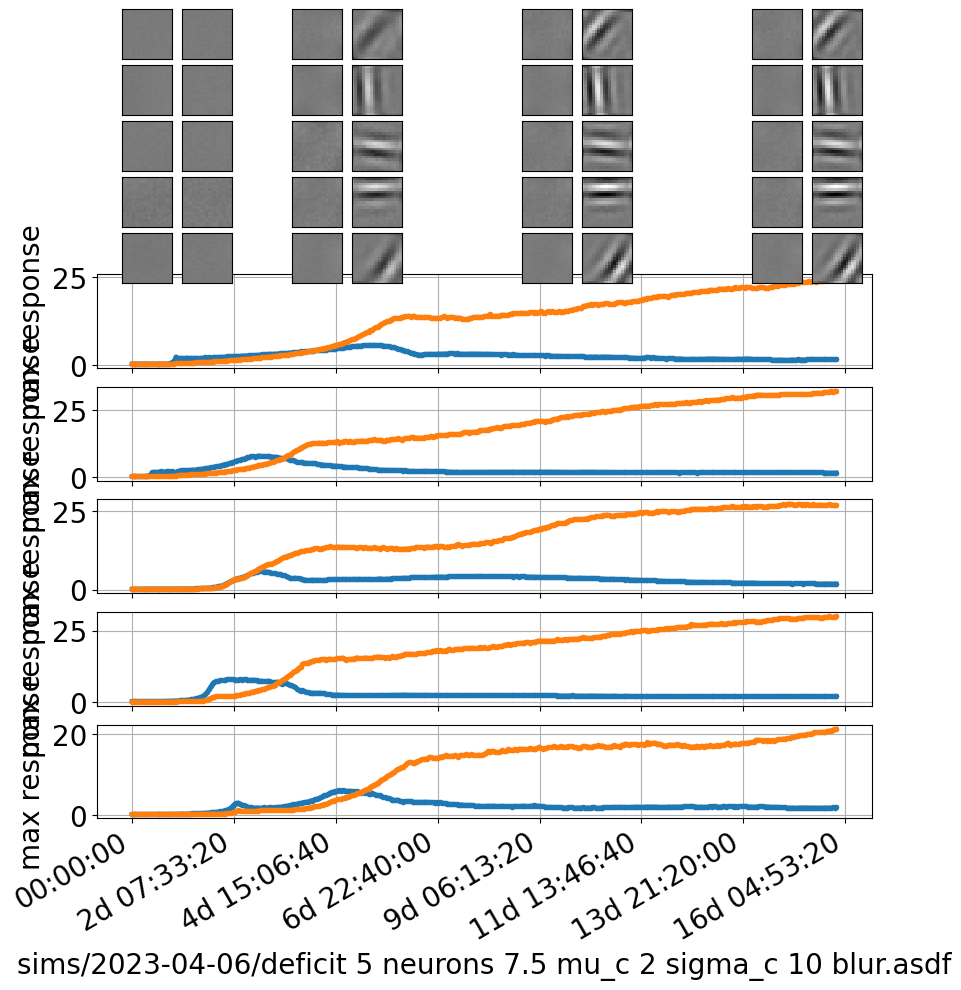

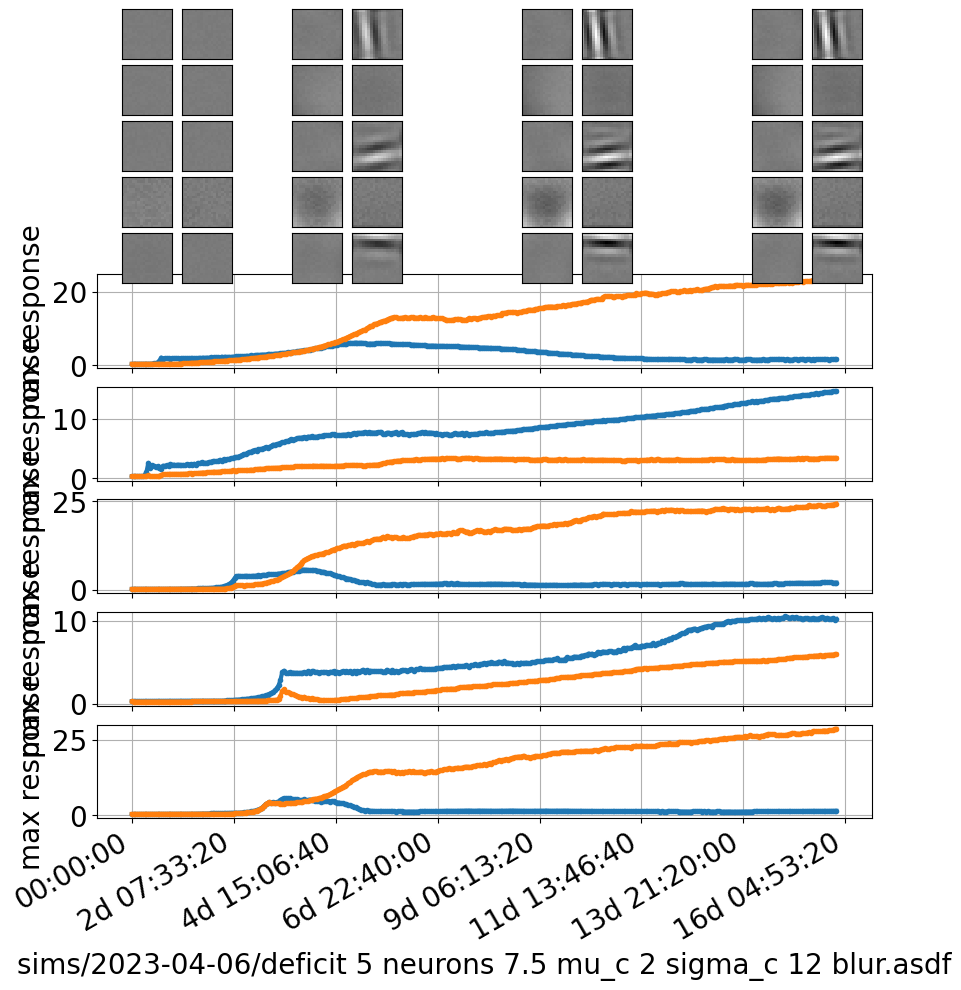

In [14]:
RR={}
for p in all_params:
    
    sfname=p.sfname
    RR[sfname]=R=Results(sfname)    
    total_time=R.t.max()
    
    figure()
    plot_max_response(sfname)
    xlabel(sfname)
    plot_mini_rfs(sfname,
                  total_time/10,.15,.85,
                  2*total_time/3,.32,.85,
                  2*2*total_time/3,.55,.85,
                  2*3*total_time/3,.78,.85,
                 )
    

    
    


## Optical Fix

In [6]:
def run_one_continuous_fix_jitter(params,
                                  overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,noise,blur,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,params.blur,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    
    deficit_base_sim=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf'
    
    seq=pn.Sequence()
    
    seq+=fix_jitter(total_time=100*hour,
             save_interval=20*minute,number_of_neurons=params.number_of_neurons,
            mu_c=mu_c,sigma_c=sigma_c,
             eta=eta,noise=noise)
    seq_load(seq,deficit_base_sim)    

    if run:
        seq.run(display_hash=False)
        pn.save(sfname,seq) 
    
    return sfname


def run_one_continuous_patch_jitter(params,
                                    overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,noise,blur,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,
                        params.blur,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname

    seq=pn.Sequence()
    deficit_base_sim=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf'
    

    seq+=patch_treatment_jitter(patch_noise=noise,
               total_time=100*hour,number_of_neurons=params.number_of_neurons,
            mu_c=mu_c,sigma_c=sigma_c,
               eta=eta,
               save_interval=20*minute)

    seq_load(seq,deficit_base_sim)    

    if run:
        seq.run(display_hash=False)
        pn.save(sfname,seq) 
    
    return sfname
            
    
def run_one_continuous_blur_jitter(params,
                                    overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,noise,blur,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,
                        params.blur,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    deficit_base_sim=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf'
    
    seq=pn.Sequence()
    seq+=treatment_jitter(blur=blur,
                   noise=0.1,
                   noise2=noise,  # treated (strong-eye) noise
                   total_time=100*hour,number_of_neurons=params.number_of_neurons,
                    mu_c=mu_c,sigma_c=sigma_c,
                   eta=eta,
                   save_interval=20*minute)
    
    seq_load(seq,deficit_base_sim)    

    if run:
        seq.run(display_hash=False)
        pn.save(sfname,seq) 

    return sfname
        
def run_one_continuous_mask_jitter(params,
                                    overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,blur,contrast,mask,f,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.blur,params.contrast,params.mask,params.f,
                                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname

    
    seq=pn.Sequence()
    deficit_base_sim=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf'

    seq+=treatment_jitter(f=f,
                   mask=mask,
                   contrast=contrast,
                   total_time=100*hour,
                   eta=eta,
                          number_of_neurons=number_of_neurons,
                    mu_c=mu_c,sigma_c=sigma_c,
                   save_interval=20*minute)
    seq_load(seq,deficit_base_sim)    

    if run:
        seq.run(display_hash=False)
        pn.save(sfname,seq) 

    
    return sfname
    
    


## Fix

In [33]:
func=run_one_continuous_fix_jitter

from collections import namedtuple

noise_mat=linspace(0,1,11)
blur=6

params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        for blur_count,blur in enumerate(blur_mat):

            for noise_count,open_eye_noise in enumerate(noise_mat):
                all_params.append(params(count=count,
                             eta=eta,
                             noise=open_eye_noise,
                                 blur=blur,
                             number_of_neurons=number_of_neurons,
                 sfname=f'{base}/optical_fix {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {open_eye_noise:.1f} noise.asdf',
                            mu_c=mu_c,sigma_c=sigma_c))

                count+=1

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.0, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.2, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.30000000000000004, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.3 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.4, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.4 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=303, eta=1e-06, noise=0.6000000000000001, blur=12, number_of_neurons=5, sfname='sims/2023-04-06/opt

In [30]:
do_params=make_do_params(all_params)
print(len(do_params))
func=run_one_continuous_fix_jitter

308


In [20]:
# %%time
print(func.__name__)
func(do_params[0],overwrite=True)

run_one_continuous_fix_jitter
Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.[.] Sequence Time Elapsed...22.53 s


'sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0.0 noise.asdf'

In [27]:
real_time=0*60+ 22
print(time2str(real_time*len(do_params)/number_of_processes))

28 m, 14.00 s


In [ ]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

## Patch

In [34]:
func=run_one_continuous_patch_jitter

noise_mat=linspace(0,1,11)

from collections import namedtuple

params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for blur_count,blur in enumerate(blur_mat):
        for noise_count,closed_eye_noise in enumerate(noise_mat):
            all_params.append(params(count=count,
                         eta=eta,
                         noise=closed_eye_noise,
                             blur=blur,
                         number_of_neurons=number_of_neurons,
             sfname=f'{base}/patch {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {closed_eye_noise:.1f} noise.asdf',
                        mu_c=mu_c,sigma_c=sigma_c))

            count+=1

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.0, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.2, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.30000000000000004, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.3 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.4, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.4 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=149, eta=1e-06, noise=0.6000000000000001, blur=12, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 7.5 mu_c 2 sigma_

In [35]:
do_params=make_do_params(all_params)
print(len(do_params))

154


In [37]:
%%time
print(func.__name__)
func(do_params[0],overwrite=True)

run_one_continuous_patch_jitter
Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.[.] Sequence Time Elapsed...1 m, 4.96 s
CPU times: user 1min 4s, sys: 851 ms, total: 1min 4s
Wall time: 1min 5s


'sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 noise.asdf'

In [39]:
real_time=1*60+ 5
print(time2str(real_time*len(do_params)/number_of_processes))

41 m, 42.50 s


In [ ]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

## Atropine

there should be a separate blur value for the atropine, but that would be too much.  rerun this later with the specified blur for the deficit.

In [44]:
func=run_one_continuous_blur_jitter

noise_mat=linspace(0,1,11)

from collections import namedtuple

params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for blur_count,blur in enumerate(blur_mat):
        for noise_count,closed_eye_noise in enumerate(noise_mat):
            all_params.append(params(count=count,
                         eta=eta,
                         noise=closed_eye_noise,
                             blur=blur,
                         number_of_neurons=number_of_neurons,
             sfname=f'{base}/atropine {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {closed_eye_noise:.1f} noise.asdf',
                        mu_c=mu_c,sigma_c=sigma_c))

            count+=1

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.0, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.2, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.30000000000000004, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.3 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.4, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.4 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=149, eta=1e-06, noise=0.6000000000000001, blur=12, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons

In [45]:
do_params=make_do_params(all_params)
print(len(do_params))

154


In [46]:
%%time
print(func.__name__)
func(do_params[0],overwrite=True)

run_one_continuous_blur_jitter
[.] Sequence Time Elapsed...57.14 s
CPU times: user 56 s, sys: 1.03 s, total: 57.1 s
Wall time: 58 s


'sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 noise.asdf'

In [47]:
real_time=1*60+ 5
print(time2str(real_time*len(do_params)/number_of_processes))

41 m, 42.50 s


In [ ]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

## Contrast and Mask

In [7]:
func=run_one_continuous_mask_jitter

contrast_mat=linspace(0,1,6)  # linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,30,50,70,90])

from collections import namedtuple


params = namedtuple('params', ['count', 'eta','blur','contrast','f','mask','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for blur_count,blur in enumerate(blur_mat):  # only the deficit
        for contrast_count,contrast in enumerate(contrast_mat):
            for mask in [0,1]:
                if mask:
                    for fc,f in enumerate(f_mat):
                        all_params.append(params(count=count,
                                     eta=eta,
                                         blur=blur,
                                                 contrast=contrast,
                                                 f=f,
                                                 mask=mask,
                                     number_of_neurons=number_of_neurons,
                         sfname=f'{base}/contrast mask {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {contrast:.1f} contrast {mask} mask {f} f.asdf',
                                    mu_c=mu_c,sigma_c=sigma_c))

                else:
                    f=10
                    all_params.append(params(count=count,
                                 eta=eta,
                                     blur=blur,
                                             contrast=contrast,
                                             f=f,
                                             mask=mask,
                                 number_of_neurons=number_of_neurons,
                     sfname=f'{base}/contrast mask {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {contrast:.1f} contrast {mask} mask {f} f.asdf',
                                mu_c=mu_c,sigma_c=sigma_c))
                    
                        
                count+=1
                    

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, blur=0, contrast=0.0, f=10, mask=0, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 0 mask 10 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=0, contrast=0.0, f=10, mask=1, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 10 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=0, contrast=0.0, f=30, mask=1, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 30 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=0, contrast=0.0, f=50, mask=1, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 50 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=0, contrast=0.0, f=70, mask=1, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 m

In [8]:
do_params=make_do_params(all_params)
print(len(do_params))

502


In [9]:
%%time
print(func.__name__)
func(do_params[0],overwrite=True)

run_one_continuous_mask_jitter
[.] Sequence Time Elapsed...54.25 s
CPU times: user 55.1 s, sys: 755 ms, total: 55.9 s
Wall time: 56.1 s


'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 30 f.asdf'

In [10]:
real_time=1*60+ 5
print(time2str(real_time*len(do_params)/number_of_processes))

2 h, 15 m, 57.50 s


In [11]:
%%time
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

 [#############################100% (ETA: 0.0 s)#############################]
.] Sequence Time Elapsed...1 m, 4.49 s
[Resolution float64 -> uint16
Resolution float64 -> uint16
Resolution float64 -> uint16
[[[.] Sequence Time Elapsed...1 m, 4.25 s
[.] Sequence Time Elapsed...1 m, 3.60 s
.] Sequence Time Elapsed...1 m, 3.68 s
.] Sequence Time Elapsed...1 m, 3.73 s
[[[.] Sequence Time Elapsed...1 m, 3.82 s
[.] Sequence Time Elapsed...1 m, 3.79 s
.] Sequence Time Elapsed...1 m, 3.83 s
.] Sequence Time Elapsed...1 m, 4.12 s
[[[.] Sequence Time Elapsed...1 m, 4.06 s
[.] Sequence Time Elapsed...1 m, 4.22 s
.] Sequence Time Elapsed...1 m, 4.23 s
.] Sequence Time Elapsed...1 m, 4.09 s
[[[.] Sequence Time Elapsed...1 m, 4.09 s
[.] Sequence Time Elapsed...1 m, 4.62 s
.] Sequence Time Elapsed...1 m, 4.60 s
.] Sequence Time Elapsed...1 m, 4.72 s
[[[.] Sequence Time Elapsed...1 m, 5.93 s
[.] Sequence Time Elapsed...1 m, 5.50 s
.] Sequence Time Elapsed...1 m, 5.19 s
.] Sequence Time Elapsed...1 m, 5

['sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 30 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 50 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 70 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 90 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 contrast 0 mask 10 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 contrast 1 mask 10 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 contrast 1 mask 30 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 contrast 1 mask 50 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 contrast 1 mask 70 f.asdf',
 'sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 contrast 1 mask 90 f.asdf',
 'sims/2023-04-06/co